## Setup paths

In [1]:
import os

In [2]:
custom_model_name = 'my_ssd_mobilenet_v2_fpnlite_320x320' 
pretrained_model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
tf_record_script_name = 'generate_tfrecord.py'
label_map_name = 'label_map.pbtxt'

In [3]:
paths = {
    'workspace_path': os.path.join('Tensorflow', 'workspace'),
    'scripts_path': os.path.join('Tensorflow','scripts'),
    'apimodel_path': os.path.join('Tensorflow','models'),
    'annotation_path': os.path.join('Tensorflow', 'workspace','annotations'),
    'image_path': os.path.join('Tensorflow', 'workspace','images'),
    'model_path': os.path.join('Tensorflow', 'workspace','models'),
    'pretrained_model_path': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'checkpoint_path': os.path.join('Tensorflow', 'workspace','models',custom_model_name), 
    'output_path': os.path.join('Tensorflow', 'workspace','models',custom_model_name, 'export'), 
    'tfjs_path':os.path.join('Tensorflow', 'workspace','models',custom_model_name, 'tfjs_export'), 
    'tflite_path':os.path.join('Tensorflow', 'workspace','models',custom_model_name, 'tflite_export'), 
    'protoc_path':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'pipeline_config':os.path.join('Tensorflow', 'workspace','models', custom_model_name, 'pipeline.config'),
    'tf_record_script': os.path.join(paths['scripts_path'], tf_record_script_name), 
    'labelmap': os.path.join(paths['annotation_path'], label_map_name)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['apimodel_path'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['apimodel_path']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.20.0/protoc-3.20.0-win64.zip"
    wget.download(url)
    !move protoc-3.20.0-win64.zip {paths['protoc_path']}
    !cd {paths['protoc_path']} && tar -xf protoc-3.20.0-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['protoc_path'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1544528 / 1544528        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack


Obtaining file:///C:/Users/gs/Documents/python/anpr/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['apimodel_path'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

^C


In [7]:
import object_detection

In [ ]:
if os.name =='posix':
    !wget {pretrained_model_url}
    !mv {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}
if os.name == 'nt':
    wget.download(pretrained_model_url)
    !move {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}

 43% [...............................                                         ]  8970240 / 20515344

2022-06-14 13:37:47.217778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-14 13:37:47.218621: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-14 13:38:03.842660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-06-14 13:38:03.842719: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-14 13:38:03.847970: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-CMA44LE
2022-06-14 13:38:03.848124: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-CMA44LE
Running tests under Python 3.9.10: C:\Users\gs\Documents\environments\tfod\Scripts\python.exe
[ RUN      ]

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## 2. Create Label Map

In [11]:
labels = [{'name':'NumberPlate', 'id':1}]

with open(files['labelmap'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 3. Create TF records

In [12]:
if not os.path.exists(files['tf_record_script']):
    !git clone https://github.com/gourav300/xml_to_tfrecord_generation {paths['scripts_path']}

In [14]:
!python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'train')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'train.record')} 
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'validation')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'validation.record')}
!python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'test')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'test.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'train_gi')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'train_gi.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'train_olx')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'train_olx.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'train_vi')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'train_vi.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'validation_gi')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'validation_gi.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'validation_olx')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'validation_olx.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'validation_vi')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'validation_vi.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'test_gi')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'test_gi.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'test_olx')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'test_olx.record')}
# !python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'test_vi')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'test_vi.record')}


Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


## 4. Copy Model pipeline.config file to Training Folder

In [9]:
if os.name =='posix':
    !cp {os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['checkpoint_path'])}
if os.name == 'nt':
    !copy {os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['checkpoint_path'])}


        1 file(s) copied.


## 5. Update Config For Transfer Learning

In [8]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
config = config_util.get_configs_from_pipeline_file(files['pipeline_config'])

In [12]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 512
       max_dimension: 512
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "ssd_efficientnet-b0_bifpn_keras"
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: SWISH
       batch_norm {
         decay: 0.9900000095367432
         scale: true
         epsilon: 0.0010000000474974513
       }
       force_use_bias: true
     }
     bifpn {
       min_level: 3
       max_level: 7
       num_iterations: 3
       num_filters: 64
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 1.0
       x_scale: 1.0
       height_scale: 1.0
       width_scale: 1.0
     }
   }
   matcher {
     argmax_matc

In [13]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['pipeline_config'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config) 

In [14]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['labelmap']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['annotation_path'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['labelmap']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['annotation_path'], 'validation.record')]

In [15]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['pipeline_config'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## 6. Train the model

In [8]:
training_sript = os.path.join(paths['apimodel_path'], 'research', 'object_detection', 'model_main_tf2.py')

In [9]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(training_sript, paths['checkpoint_path'],files['pipeline_config'])

In [10]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficientdet_D0_512x512_v2 --pipeline_config_path=Tensorflow\workspace\models\my_efficientdet_D0_512x512_v2\pipeline.config --num_train_steps=5000


## 7. Evaluate the Model

In [9]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(training_sript, paths['checkpoint_path'],files['pipeline_config'], paths['checkpoint_path'])

In [10]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobilenet_v2_fpnlite_320x320 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobilenet_v2_fpnlite_320x320\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobilenet_v2_fpnlite_320x320


## 8. TensorBoard

In [11]:
log_dir = os.path.join('Tensorflow', 'workspace','models',custom_model_name)
log_dir

'Tensorflow\\workspace\\models\\my_ssd_mobilenet_v2_fpnlite_320x320'

In [12]:
# This command should be run from the parent directory of Tensorflow folder
print(f"tensorboard --logdir ={log_dir}")

tensorboard --logdir =Tensorflow\workspace\models\my_ssd_mobilenet_v2_fpnlite_320x320


## 9. Load Train Model From Checkpoint

In [13]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [14]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['pipeline_config'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['checkpoint_path'], 'ckpt-106')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## 10. Detect from an Image

In [15]:
import cv2 
import uuid
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
category_index = label_map_util.create_category_index_from_labelmap(files['labelmap'])

In [17]:
img_path = os.path.join(paths['image_path'], 'validation', 'AN1.jpg')

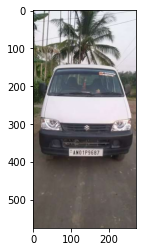

In [18]:
img = cv2.imread(img_path)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
def predict(folder_path,threshold):
    
    file_list = [file for file in os.listdir(folder_path) 
         if os.path.isfile(os.path.join(folder_path, file))]
    
    jpg_list = []
    substring = '.jpg'
    jpg_list = [string for string in file_list if substring in string]
    for jpg in jpg_list:
        
        img = cv2.imread(os.path.join(folder_path,jpg))
        image_height = img.shape[0]
        image_width = img.shape[1]
        image_np = np.array(img)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                    image_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes']+label_id_offset,
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    min_score_thresh=threshold,
                    agnostic_mode=False)

        # print(detections)
        #get data(label, xmin, ymin, xmax, ymax)
  
        output = []
        for index, score in enumerate(detections['detection_scores']):
            if score < threshold:
                continue
            label = category_index[detections['detection_classes'][index] + label_id_offset]['name']
            # print(label)
            ymin, xmin, ymax, xmax = detections['detection_boxes'][index]
            output.append((label, int(xmin * image_width), int(ymin * image_height),
                           int(xmax * image_width), int(ymax * image_height)))

        # save incident 
        for l, x_min, y_min, x_max, y_max in output:
            
            if l == "NumberPlate": #label_to_look_for
                array = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
                image = Image.fromarray(array)
                cropped_img = image.crop((x_min, y_min, x_max, y_max))
                imgname = os.path.join('Tensorflow', 'workspace','images',f'{str(uuid.uuid1())}.jpg')
                cropped_img.save(imgname, 'JPEG', icc_profile=cropped_img.info.get('icc_profile'))
            # df.loc[len(df)] = [datetime.datetime.now(), file_path]
            # df.to_csv(output_dir+'/results.csv', index=None)
        
        ## to save full images with bounding boxes
        # cv2.imwrite(os.path.join('Tensorflow', 'workspace','images','results',jpg), image_np_with_detections)
        
        ## to plot images
        # plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
        # plt.show()

In [26]:
folder_path = "Tensorflow/workspace/images/validation"

In [ ]:
predict(folder_path,0.2)